In [16]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [18]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [19]:
from citipy import citipy

In [20]:
# Create a list for holding the cities.
cities = []

In [21]:
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

589

In [22]:
# Import the requests library.
import requests

from config import weather_api_key

In [23]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0ff0971f990db1587740f2c43fc6ae55


In [24]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [25]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")


# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | viedma
Processing Record 2 of Set 1 | qaanaaq
Processing Record 3 of Set 1 | adrar
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | arraial do cabo
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | bose
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | kaeo
Processing Record 11 of Set 1 | itarema
Processing Record 12 of Set 1 | provideniya
Processing Record 13 of Set 1 | moate
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | le port
Processing Record 16 of Set 1 | nanortalik
Processing Record 17 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 18 of Set 1 | hasaki
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | katakwi
Processing Record 21 of Set 1 | ihosy
Processing Record 22 of Set 1 | sumkino
Processing Record 23 of Set 1 | vaini
Pr

Processing Record 43 of Set 4 | karaul
City not found. Skipping...
Processing Record 44 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 45 of Set 4 | gat
Processing Record 46 of Set 4 | tuatapere
Processing Record 47 of Set 4 | nelson bay
Processing Record 48 of Set 4 | kohima
Processing Record 49 of Set 4 | tuy hoa
Processing Record 50 of Set 4 | atambua
Processing Record 1 of Set 5 | jackson
Processing Record 2 of Set 5 | shenzhen
Processing Record 3 of Set 5 | luderitz
Processing Record 4 of Set 5 | yarada
Processing Record 5 of Set 5 | cacoal
Processing Record 6 of Set 5 | pevek
Processing Record 7 of Set 5 | tshikapa
Processing Record 8 of Set 5 | sitka
Processing Record 9 of Set 5 | hrusovany nad jevisovkou
Processing Record 10 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 11 of Set 5 | ozernovskiy
Processing Record 12 of Set 5 | lodwar
Processing Record 13 of Set 5 | tiarei
Processing Record 14 of Set 5 | tsihombe
City not found.

Processing Record 35 of Set 8 | yen bai
Processing Record 36 of Set 8 | husavik
Processing Record 37 of Set 8 | pandharpur
Processing Record 38 of Set 8 | toliary
City not found. Skipping...
Processing Record 39 of Set 8 | severo-kurilsk
Processing Record 40 of Set 8 | dobresti
Processing Record 41 of Set 8 | stykkisholmur
Processing Record 42 of Set 8 | kamien pomorski
Processing Record 43 of Set 8 | port lincoln
Processing Record 44 of Set 8 | sonoita
Processing Record 45 of Set 8 | half moon bay
Processing Record 46 of Set 8 | coron
Processing Record 47 of Set 8 | mulatupo
Processing Record 48 of Set 8 | karachev
Processing Record 49 of Set 8 | leningradskiy
Processing Record 50 of Set 8 | itoman
Processing Record 1 of Set 9 | haines junction
Processing Record 2 of Set 9 | bathsheba
Processing Record 3 of Set 9 | yar-sale
Processing Record 4 of Set 9 | salinas
Processing Record 5 of Set 9 | tottori
Processing Record 6 of Set 9 | dutse
Processing Record 7 of Set 9 | kamenskiy
Process

Processing Record 18 of Set 12 | maputo
Processing Record 19 of Set 12 | sumenep
Processing Record 20 of Set 12 | hobyo
Processing Record 21 of Set 12 | nepalganj
City not found. Skipping...
Processing Record 22 of Set 12 | damaturu
Processing Record 23 of Set 12 | kikwit
Processing Record 24 of Set 12 | pringsewu
Processing Record 25 of Set 12 | pajan
Processing Record 26 of Set 12 | tongzi
Processing Record 27 of Set 12 | tucupita
Processing Record 28 of Set 12 | porto velho
Processing Record 29 of Set 12 | plettenberg bay
Processing Record 30 of Set 12 | carauari
Processing Record 31 of Set 12 | beringovskiy
Processing Record 32 of Set 12 | urucara
Processing Record 33 of Set 12 | lima
Processing Record 34 of Set 12 | ust-kuyga
Processing Record 35 of Set 12 | kavieng
Processing Record 36 of Set 12 | millinocket
Processing Record 37 of Set 12 | gorontalo
Processing Record 38 of Set 12 | great falls
Processing Record 39 of Set 12 | khuzhir
-----------------------------
Data Retrieval

In [29]:
len(city_data)

545

In [33]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Viedma,-40.8135,-62.9967,60.84,30,81,12.57,AR,2022-04-30 20:20:27
1,Qaanaaq,77.4840,-69.3632,14.74,76,80,2.57,GL,2022-04-30 20:32:03
2,Adrar,20.5022,-10.0711,83.26,10,0,7.67,MR,2022-04-30 20:24:39
3,Atuona,-9.8000,-139.0333,78.80,76,9,12.57,PF,2022-04-30 20:32:04
4,Arraial Do Cabo,-22.9661,-42.0278,75.06,83,75,9.22,BR,2022-04-30 20:28:19
5,Albany,42.6001,-73.9662,64.26,24,89,1.01,US,2022-04-30 20:28:44
6,Iqaluit,63.7506,-68.5145,24.53,79,75,10.36,CA,2022-04-30 20:22:06
7,Bose,45.4612,8.0137,56.79,67,99,5.12,IT,2022-04-30 20:32:05
8,Kapaa,22.0752,-159.3190,78.78,77,75,19.57,US,2022-04-30 20:22:11
9,Kaeo,-35.1000,173.7833,63.10,82,72,6.42,NZ,2022-04-30 20:32:05


In [41]:
new_column_order = ["column2", "column4", "column1"]
new_column_order

['column2', 'column4', 'column1']

In [45]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Viedma,-40.8135,-62.9967,60.84,30,81,12.57,AR,2022-04-30 20:20:27
1,Qaanaaq,77.4840,-69.3632,14.74,76,80,2.57,GL,2022-04-30 20:32:03
2,Adrar,20.5022,-10.0711,83.26,10,0,7.67,MR,2022-04-30 20:24:39
3,Atuona,-9.8000,-139.0333,78.80,76,9,12.57,PF,2022-04-30 20:32:04
4,Arraial Do Cabo,-22.9661,-42.0278,75.06,83,75,9.22,BR,2022-04-30 20:28:19
5,Albany,42.6001,-73.9662,64.26,24,89,1.01,US,2022-04-30 20:28:44
6,Iqaluit,63.7506,-68.5145,24.53,79,75,10.36,CA,2022-04-30 20:22:06
7,Bose,45.4612,8.0137,56.79,67,99,5.12,IT,2022-04-30 20:32:05
8,Kapaa,22.0752,-159.3190,78.78,77,75,19.57,US,2022-04-30 20:22:11
9,Kaeo,-35.1000,173.7833,63.10,82,72,6.42,NZ,2022-04-30 20:32:05


In [49]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [52]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

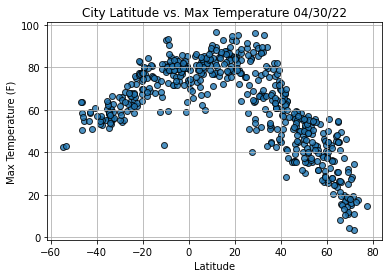

In [53]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

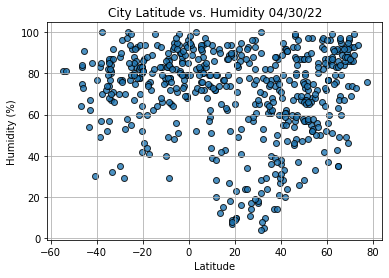

In [54]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

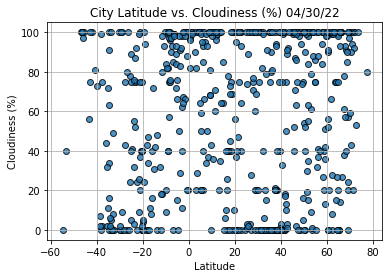

In [55]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

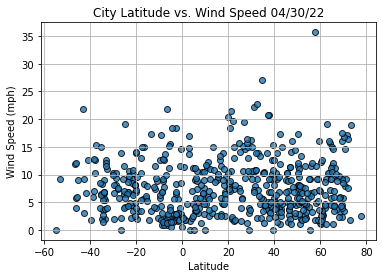

In [56]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [58]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [60]:
index13 = city_data_df.loc[13]
index13

City                      Mataura
Lat                      -46.1927
Lng                      168.8643
Max Temp                    63.48
Humidity                       83
Cloudiness                    100
Wind Speed                   3.94
Country                        NZ
Date          2022-04-30 20:32:06
Name: 13, dtype: object

In [61]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4      False
       ...  
540    False
541     True
542     True
543     True
544     True
Name: Lat, Length: 545, dtype: bool

In [62]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Qaanaaq,77.4840,-69.3632,14.74,76,80,2.57,GL,2022-04-30 20:32:03
2,Adrar,20.5022,-10.0711,83.26,10,0,7.67,MR,2022-04-30 20:24:39
5,Albany,42.6001,-73.9662,64.26,24,89,1.01,US,2022-04-30 20:28:44
6,Iqaluit,63.7506,-68.5145,24.53,79,75,10.36,CA,2022-04-30 20:22:06
7,Bose,45.4612,8.0137,56.79,67,99,5.12,IT,2022-04-30 20:32:05
...,...,...,...,...,...,...,...,...,...
539,Ust-Kuyga,70.0167,135.6000,17.92,87,59,8.50,RU,2022-04-30 20:46:33
541,Millinocket,45.6573,-68.7098,51.91,46,100,10.36,US,2022-04-30 20:46:33
542,Gorontalo,0.5412,123.0595,74.37,95,82,2.13,ID,2022-04-30 20:46:34
543,Great Falls,47.5002,-111.3008,57.16,37,0,16.11,US,2022-04-30 20:42:52


In [63]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Qaanaaq,77.4840,-69.3632,14.74,76,80,2.57,GL,2022-04-30 20:32:03
2,Adrar,20.5022,-10.0711,83.26,10,0,7.67,MR,2022-04-30 20:24:39
5,Albany,42.6001,-73.9662,64.26,24,89,1.01,US,2022-04-30 20:28:44
6,Iqaluit,63.7506,-68.5145,24.53,79,75,10.36,CA,2022-04-30 20:22:06
7,Bose,45.4612,8.0137,56.79,67,99,5.12,IT,2022-04-30 20:32:05


In [64]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [65]:
northern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Qaanaaq,77.4840,-69.3632,14.74,76,80,2.57,GL,2022-04-30 20:32:03
2,Adrar,20.5022,-10.0711,83.26,10,0,7.67,MR,2022-04-30 20:24:39
5,Albany,42.6001,-73.9662,64.26,24,89,1.01,US,2022-04-30 20:28:44
6,Iqaluit,63.7506,-68.5145,24.53,79,75,10.36,CA,2022-04-30 20:22:06
7,Bose,45.4612,8.0137,56.79,67,99,5.12,IT,2022-04-30 20:32:05
...,...,...,...,...,...,...,...,...,...
539,Ust-Kuyga,70.0167,135.6000,17.92,87,59,8.50,RU,2022-04-30 20:46:33
541,Millinocket,45.6573,-68.7098,51.91,46,100,10.36,US,2022-04-30 20:46:33
542,Gorontalo,0.5412,123.0595,74.37,95,82,2.13,ID,2022-04-30 20:46:34
543,Great Falls,47.5002,-111.3008,57.16,37,0,16.11,US,2022-04-30 20:42:52


In [66]:
southern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Viedma,-40.8135,-62.9967,60.84,30,81,12.57,AR,2022-04-30 20:20:27
3,Atuona,-9.8000,-139.0333,78.80,76,9,12.57,PF,2022-04-30 20:32:04
4,Arraial Do Cabo,-22.9661,-42.0278,75.06,83,75,9.22,BR,2022-04-30 20:28:19
9,Kaeo,-35.1000,173.7833,63.10,82,72,6.42,NZ,2022-04-30 20:32:05
10,Itarema,-2.9248,-39.9167,80.33,86,11,8.21,BR,2022-04-30 20:25:46
...,...,...,...,...,...,...,...,...,...
534,Plettenberg Bay,-34.0527,23.3716,57.72,77,2,6.85,ZA,2022-04-30 20:46:30
535,Carauari,-4.8828,-66.8958,80.94,92,76,1.39,BR,2022-04-30 20:46:31
537,Urucara,-2.5364,-57.7600,79.77,91,64,2.80,BR,2022-04-30 20:46:32
538,Lima,-12.0432,-77.0282,68.25,68,0,11.50,PE,2022-04-30 20:46:32


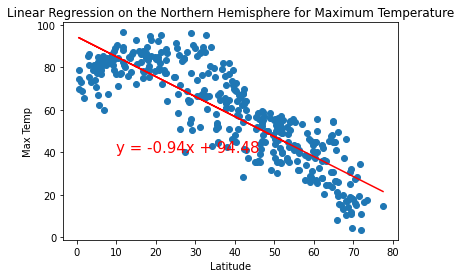

In [82]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

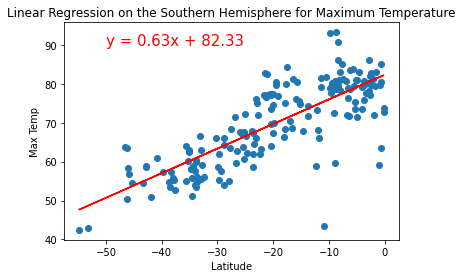

In [83]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

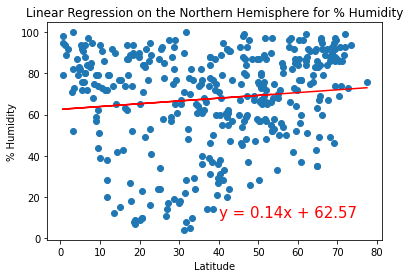

In [88]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

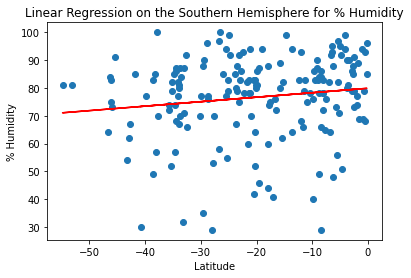

In [89]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

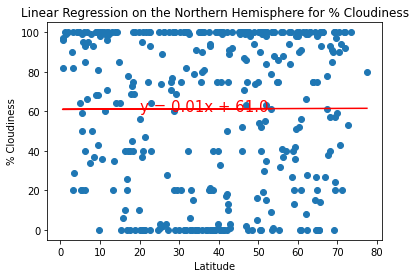

In [101]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(20,60))

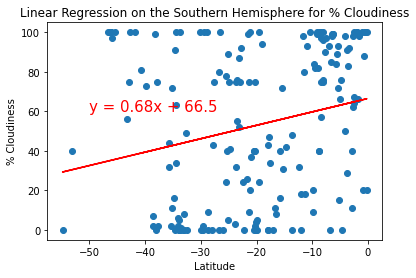

In [98]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

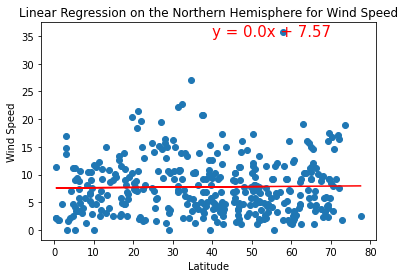

In [103]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

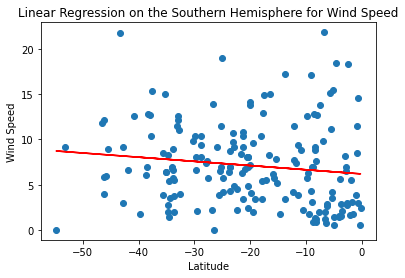

In [106]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-60,45))